# Installing and Importing packages

In [2]:
.libPaths( c( "/tempr" , .libPaths() ) )

In [3]:
requiredPackages <- c("dplyr", # Data manipulation library
                      "data.table", # Fast processing of large data
                      "protr", # Generating numerical representation of protein sequences
                      "ggplot2", # Plotting Data package
                      "gplots",  # Plotting Data package
                      "RColorBrewer",  # Ready-to-use color palettes for graphics
                      "ggpubr",
                      "caret",
                      "gridExtra",
                      "BiocManager",
                      "ggfortify")

for (pkg in requiredPackages) { 
    if(! pkg %in% row.names(installed.packages())) install.packages(pkg)
}

if(! "pcaMethods" %in% row.names(installed.packages()))
    BiocManager::install("pcaMethods", warning=stop)

In [7]:
library(dplyr)
library(data.table)
library(protr)
library(ggplot2)
library(gplots)
library(RColorBrewer)
library(ggpubr)
library(caret)
library(gridExtra)
library(pcaMethods)
library(ggfortify)

source("functions.R")

options(stringsAsFactors = FALSE)

set.seed(123) 

options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)

# Generate protein descriptors

This will generate protein descriptors (SOCN) with the "[protr](https://cran.r-project.org/web/packages/protr/vignettes/protr.html)" package. 
1. **Input**: the protein sequences in FASTA format under "work/fasta" (26 FASTA files for the 26 proteins).
1. **Output**: the results are saved to the file "work/data/protein_descriptors.tsv" 

In [5]:
protein_descriptors <- generateProteinsDescriptors()

# The dual model approach (two ML models)

## Generate the protein-ligand features dataset (six different splittings)

#### Data balancing

In [25]:
pdb <- c("1owh","2c3i","2hb1","2y5h","3jvr","4dli","4e5w","4jia","4m0y","4twp",
         "5a7b","3udh","5c28","4wiv","3b5r","3b27","3fv1","3pxf","3u9q","3up2",
         "2pog", "2weg", "4gr0", "4j21", "3utu")

In [26]:
results <- prepareFeaturesProteinLigand("4crc")

In [29]:
for(i in pdb){
  results <- rbind(results,prepareFeaturesProteinLigand(i))
}

#### Data preprocessing

In [ ]:
results <- results[results$ba < -4,]
results <- results[results$ba >= -16,]

results_meta <- results[,c(1:4)]
results <- results[,c(5:ncol(results))]

In [30]:
print(paste("Rows:",nrow(results)))
print(paste("Columns:",ncol(results)))

[1] "Rows: 8421"
[1] "Columns: 124"


In [31]:
nzv_columns <- nearZeroVar(results)
colnames(results)[nzv_columns]

[1] "SmallRingDescriptor5"   "SmallRingDescriptor6"   "CarbonTypesDescriptor1"
[4] "CarbonTypesDescriptor2"

In [32]:
results <- results[,-nzv_columns]

In [33]:
print(paste("Rows:",nrow(results)))
print(paste("Columns:",ncol(results)))

[1] "Rows: 8421"
[1] "Columns: 120"


In [34]:
unique(results$RuleOfFiveDescriptor)

[1] "V2" "V0" "V1" "V3" "V4" "V5"

In [35]:
dummies <- dummyVars(ba ~ ., data = results)
dummies_tmp <- predict(dummies, newdata = results)

results <- cbind(dummies_tmp, results$ba)

colnames(results)[length(colnames(results))] <- "ba"

results <- as.data.frame(results)

In [36]:
colnames(results)

[1] "WeightDescriptor"              "RuleOfFiveDescriptorV0"       
  [3] "RuleOfFiveDescriptorV1"        "RuleOfFiveDescriptorV2"       
  [5] "RuleOfFiveDescriptorV3"        "RuleOfFiveDescriptorV4"       
  [7] "RuleOfFiveDescriptorV5"        "RotatableBondsCountDescriptor"
  [9] "HBondDonorCountDescriptor"     "HBondAcceptorCountDescriptor" 
 [11] "APolDescriptor"                "SmallRingDescriptor1"         
 [13] "SmallRingDescriptor2"          "SmallRingDescriptor3"         
 [15] "SmallRingDescriptor4"          "SmallRingDescriptor7"         
 [17] "SmallRingDescriptor8"          "SmallRingDescriptor9"         
 [19] "VABCDescriptor"                "TPSADescriptor"               
 [21] "FractionalPSADescriptor"       "MomentOfInertiaDescriptor1"   
 [23] "MomentOfInertiaDescriptor2"    "MomentOfInertiaDescriptor3"   
 [25] "MomentOfInertiaDescriptor4"    "MomentOfInertiaDescriptor5"   
 [27] "MomentOfInertiaDescriptor6"    "MomentOfInertiaDescriptor7"   
 [29] "AromaticAtomsCountDescriptor"  "AromaticBondsCountDescriptor" 
 [31] "AtomCountDescriptor"           "XLogPDescriptor"              
 [33] "VAdjMaDescriptor"              "BasicGroupCountDescriptor"    
 [35] "TotalSurfaceArea"              "AlogPDescriptor1"             
 [37] "AlogPDescriptor2"              "AlogPDescriptor3"             
 [39] "JPlogPDescriptor"              "BCUTDescriptor1"              
 [41] "BCUTDescriptor2"               "BCUTDescriptor3"              
 [43] "BCUTDescriptor4"               "BCUTDescriptor5"              
 [45] "BCUTDescriptor6"               "AtomCountDescriptorN"         
 [47] "AtomCountDescriptorO"          "Electronegativity"            
 [49] "CarbonTypesDescriptor3"        "CarbonTypesDescriptor4"       
 [51] "CarbonTypesDescriptor5"        "CarbonTypesDescriptor6"       
 [53] "CarbonTypesDescriptor7"        "CarbonTypesDescriptor8"       
 [55] "CarbonTypesDescriptor9"        "Schneider.lag1"               
 [57] "Schneider.lag2"                "Schneider.lag3"               
 [59] "Schneider.lag4"                "Schneider.lag5"               
 [61] "Schneider.lag6"                "Schneider.lag7"               
 [63] "Schneider.lag8"                "Schneider.lag9"               
 [65] "Schneider.lag10"               "Schneider.lag11"              
 [67] "Schneider.lag12"               "Schneider.lag13"              
 [69] "Schneider.lag14"               "Schneider.lag15"              
 [71] "Schneider.lag16"               "Schneider.lag17"              
 [73] "Schneider.lag18"               "Schneider.lag19"              
 [75] "Schneider.lag20"               "Schneider.lag21"              
 [77] "Schneider.lag22"               "Schneider.lag23"              
 [79] "Schneider.lag24"               "Schneider.lag25"              
 [81] "Schneider.lag26"               "Schneider.lag27"              
 [83] "Schneider.lag28"               "Schneider.lag29"              
 [85] "Schneider.lag30"               "Grantham.lag1"                
 [87] "Grantham.lag2"                 "Grantham.lag3"                
 [89] "Grantham.lag4"                 "Grantham.lag5"                
 [91] "Grantham.lag6"                 "Grantham.lag7"                
 [93] "Grantham.lag8"                 "Grantham.lag9"                
 [95] "Grantham.lag10"                "Grantham.lag11"               
 [97] "Grantham.lag12"                "Grantham.lag13"               
 [99] "Grantham.lag14"                "Grantham.lag15"               
[101] "Grantham.lag16"                "Grantham.lag17"               
[103] "Grantham.lag18"                "Grantham.lag19"               
[105] "Grantham.lag20"                "Grantham.lag21"               
[107] "Grantham.lag22"                "Grantham.lag23"               
[109] "Grantham.lag24"                "Grantham.lag25"               
[111] "Grantham.lag26"                "Grantham.lag27"               
[113] "Grantham.lag28"                "Grantham.lag29"               
[115] "Grant

#### Data splitting

In [38]:
#### First Way ####

train.index <- splitWithCategoricalCheck(results, results$ba)

training_data <- results[train.index,]
test_data <- results[-train.index,]

training_meta <- results_meta[train.index,]
test_meta <- results_meta[-train.index,]

fwrite(training_data, file="work/training/dual-model/train-random.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_data, file="work/training/dual-model/test-random.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")

fwrite(training_meta, file="work/training/dual-model/train-meta-random.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_meta, file="work/training/dual-model/test-meta-random.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")


In [39]:
#### Second way ####

test.index.protein <- which(results_meta$pdb %in% c("2hb1", "2weg", "4wiv", "3b27", "3udh"))

training_data <- results[-test.index.protein,]
test_data <- results[test.index.protein,]

training_meta <- results_meta[-test.index.protein,]
test_meta <- results_meta[test.index.protein,]

fwrite(training_data, file="work/training/dual-model/train-protein.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_data, file="work/training/dual-model/test-protein.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")

fwrite(training_meta, file="work/training/dual-model/train-meta-protein.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_meta, file="work/training/dual-model/test-meta-protein.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")


In [40]:
#### Third way ####

test.index.pocket <- which(results_meta$pdb %in% c("1owh","5a7b","3b5r","4j21","5c28"))

training_data <- results[-test.index.pocket,]
test_data <- results[test.index.pocket,]

training_meta <- results_meta[-test.index.pocket,]
test_meta <- results_meta[test.index.pocket,]

fwrite(training_data, file="work/training/dual-model/train-pocket.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_data, file="work/training/dual-model/test-pocket.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")

fwrite(training_meta, file="work/training/dual-model/train-meta-pocket.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_meta, file="work/training/dual-model/test-meta-pocket.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")


In [41]:
#### Fourth way ####

pdba <- c("4crc", pdb)

train.index.weight <- getTrainSetByLigand(pdba, results_meta, by="weight")

training_data <- results[train.index.weight,]
test_data <- results[-train.index.weight,]

training_meta <- results_meta[train.index.weight,]
test_meta <- results_meta[-train.index.weight,]

fwrite(training_data, file="work/training/dual-model/train-ligand-weight.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_data, file="work/training/dual-model/test-ligand-weight.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")

fwrite(training_meta, file="work/training/dual-model/train-meta-ligand-weight.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_meta, file="work/training/dual-model/test-meta-ligand-weight.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")


In [42]:
#### Fifth way ####

train.index.tpsa <- getTrainSetByLigand(pdba, results_meta, by="tpsa")

training_data <- results[train.index.tpsa,]
test_data <- results[-train.index.tpsa,]

training_data <- results[train.index.tpsa,]
test_data <- results[-train.index.tpsa,]

fwrite(training_data, file="work/training/dual-model/train-ligand-tpsa.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_data, file="work/training/dual-model/test-ligand-tpsa.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")

fwrite(training_meta, file="work/training/dual-model/train-meta-ligand-tpsa.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_meta, file="work/training/dual-model/test-meta-ligand-tpsa.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")


In [43]:
#### Sixth way ####

train.index.volume <- getTrainSetByLigand(pdba, results_meta, by="volume")

training_data <- results[train.index.volume,]
test_data <- results[-train.index.volume,]

training_data <- results[train.index.volume,]
test_data <- results[-train.index.volume,]

fwrite(training_data, file="work/training/dual-model/train-ligand-volume.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_data, file="work/training/dual-model/test-ligand-volume.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")

fwrite(training_meta, file="work/training/dual-model/train-meta-ligand-volume.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_meta, file="work/training/dual-model/test-meta-ligand-volume.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")


## Generate the mutation features dataset (random splitting)

#### Data balancing

In [5]:
training_data <- fread(file="work/training/dual-model/train-ligand-weight.csv", quote = FALSE, sep = ",")
test_data <- fread(file="work/training/dual-model/test-ligand-weight.csv", quote = FALSE, sep = ",")

training_meta <- fread(file="work/training/dual-model/train-meta-ligand-weight.csv", quote = FALSE, sep = ",")
test_meta <- fread(file="work/training/dual-model/test-meta-ligand-weight.csv", quote = FALSE, sep = ",")

In [6]:
train_test_meta <- rbind(training_meta, test_meta)

In [7]:
pdb <- c("1owh","2c3i","2hb1","2y5h","3jvr","4dli","4e5w","4jia","4m0y","4twp",
         "5a7b","3udh","5c28","4wiv","3b5r","3b27","3fv1","3pxf","3u9q","3up2",
         "2pog", "2weg", "4gr0", "4j21", "3utu")

In [8]:
results <- prepareFeaturesMutations("4crc", train_test_meta$ligand)

In [9]:
for(i in pdb){
  results <- rbind(results,prepareFeaturesMutations(i, train_test_meta$ligand))
}

#### Data preprocessing

In [ ]:
results <- results[results$ba < -4,]
results <- results[results$ba >= -16,]

results_meta <- results[,c(1:3)]
results <- results[,c(4:ncol(results))]

In [10]:
print(paste("Rows:",nrow(results)))
print(paste("Columns:",ncol(results)))

[1] "Rows: 197925"
[1] "Columns: 135"


In [11]:
nzv_columns <- nearZeroVar(results)
colnames(results)[nzv_columns]

[1] "Sidechain_Hbond"        "Electrostatics"         "sloop_entropy"         
 [4] "mloop_entropy"          "cis_bond"               "helix_dipole"          
 [7] "water_bridge"           "disulfide"              "electrostatic_kon"     
[10] "partial_covalent_bonds" "energy_Ionisation"      "Entropy_Complex"

In [12]:
results <- results[,-nzv_columns]

In [13]:
print(paste("Rows:",nrow(results)))
print(paste("Columns:",ncol(results)))

[1] "Rows: 197925"
[1] "Columns: 123"


In [14]:
dummies <- dummyVars(ba ~ ., data = results)
dummies_tmp <- predict(dummies, newdata = results)

results <- cbind(dummies_tmp, results$ba)

colnames(results)[length(colnames(results))] <- "ba"

results <- as.data.frame(results)

#### Data splitting

In [15]:
#### Random Split ####

train.index <- createDataPartition(results$ba, p = .8, list = FALSE)

training_data <- results[train.index,]
test_data <- results[-train.index,]

training_meta <- results_meta[train.index,]
test_meta <- results_meta[-train.index,]

fwrite(training_data, file="work/training/dual-model/train-mutations-random.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_data, file="work/training/dual-model/test-mutations-random.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")

fwrite(training_meta, file="work/training/dual-model/train-mutations-meta-random.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")
fwrite(test_meta, file="work/training/dual-model/test-mutations-meta-random.csv", quote = FALSE, row.names = FALSE, col.names = TRUE, sep = ",")


In [16]:
colnames(results)

[1] "secStruct3-10 Helix"                                
  [2] "secStructalpha Helix"                               
  [3] "secStructBend"                                      
  [4] "secStructBridge"                                    
  [5] "secStructCoil"                                      
  [6] "secStructExtended"                                  
  [7] "secStructTurn"                                      
  [8] "secStructSimpleHelix"                               
  [9] "secStructSimpleOther"                               
 [10] "secStructSimpleStrand"                              
 [11] "CysteineMutationNO"                                 
 [12] "CysteineMutationYES"                                
 [13] "GlycineMutationNO"                                  
 [14] "GlycineMutationYES"                                 
 [15] "ProlineMutationNO"                                  
 [16] "ProlineMutationYES"                                 
 [17] "ChargeGroupChangegroup1-group1"                     
 [18] "ChargeGroupChangegroup1-group2"                     
 [19] "ChargeGroupChangegroup1-group3"                     
 [20] "ChargeGroupChangegroup2-group1"                     
 [21] "ChargeGroupChangegroup2-group2"                     
 [22] "ChargeGroupChangegroup2-group3"                     
 [23] "ChargeGroupChangegroup3-group1"                     
 [24] "ChargeGroupChangegroup3-group2"                     
 [25] "ChargeGroupChangegroup3-group3"                     
 [26] "HydroGroupChangegroup1-group1"                      
 [27] "HydroGroupChangegroup1-group2"                      
 [28] "HydroGroupChangegroup1-group3"                      
 [29] "HydroGroupChangegroup2-group1"                      
 [30] "HydroGroupChangegroup2-group2"                      
 [31] "HydroGroupChangegroup2-group3"                      
 [32] "HydroGroupChangegroup3-group1"                      
 [33] "HydroGroupChangegroup3-group2"                      
 [34] "HydroGroupChangegroup3-group3"                      
 [35] "VanDerWaalsVolumeGroupChangegroup1-group1"          
 [36] "VanDerWaalsVolumeGroupChangegroup1-group2"          
 [37] "VanDerWaalsVolumeGroupChangegroup1-group3"          
 [38] "VanDerWaalsVolumeGroupChangegroup2-group1"          
 [39] "VanDerWaalsVolumeGroupChangegroup2-group2"          
 [40] "VanDerWaalsVolumeGroupChangegroup2-group3"          
 [41] "VanDerWaalsVolumeGroupChangegroup3-group1"          
 [42] "VanDerWaalsVolumeGroupChangegroup3-group2"          
 [43] "VanDerWaalsVolumeGroupChangegroup3-group3"          
 [44] "PloarityGroupChangegroup1-group1"                   
 [45] "PloarityGroupChangegroup1-group2"                   
 [46] "PloarityGroupChangegroup1-group3"                   
 [47] "PloarityGroupChangegroup2-group1"                   
 [48] "PloarityGroupChangegroup2-group2"                   
 [49] "PloarityGroupChangegroup2-group3"                   
 [50] "PloarityGroupChangegroup3-group1"                   
 [51] "PloarityGroupChangegroup3-group2"                   
 [52] "PloarityGroupChangegroup3-group3"                   
 [53] "PolarizabilityGroupChangegroup1-group1"             
 [54] "PolarizabilityGroupChangegroup1-group2"             
 [55] "PolarizabilityGroupChangegroup1-group3"             
 [56] "PolarizabilityGroupChangegroup2-group1"             
 [57] "PolarizabilityGroupChangegroup2-group2"             
 [58] "PolarizabilityGroupChangegroup2-group3"             
 [59] "PolarizabilityGroupChangegroup3-group1"             
 [60] "PolarizabilityGroupChangegroup3-group2"             
 [61] "PolarizabilityGroupChangegroup3-group3"             
 [62] "SSWTGroupChangegroup1-group1"                       
 [63] "SSWTGroupChangegroup1-group2"                       
 [64] "SSWTGroupChangegroup1-group3"                       
 [65] "SSWTGroupChangegroup2-group1"                       
 [66] "SSWTGroupChangegroup2-group2"                       
 [67] "SSWTGroupChangegroup2-group3"      

# Molecular Properties Visualization

In [61]:
training_data <- fread(file="work/training/dual-model/train-ligand-weight.csv", quote = FALSE, sep = ",")
test_data <- fread(file="work/training/dual-model/test-ligand-weight.csv", quote = FALSE, sep = ",")

training_meta <- fread(file="work/training/dual-model/train-meta-ligand-weight.csv", quote = FALSE, sep = ",")
test_meta <- fread(file="work/training/dual-model/test-meta-ligand-weight.csv", quote = FALSE, sep = ",")

In [62]:
dim(training_data)
dim(test_data)

[1] 6770  126

[1] 1651  126

In [63]:
results <- rbind(training_data, test_data)

In [64]:
png("images/properties/summary.png", width = 1600, height = 1600, res = 150, units = "px")


plot1 <- qplot(results$HBondAcceptorCountDescriptor,
               geom="histogram", 
               xlab = "H-bond acceptor count",
               ylab = "Frequency",
               binwidth=1)

plot2 <-qplot(results$RotatableBondsCountDescriptor,
              geom="histogram", 
              xlab = "Rotatable bonds count",
              ylab = "Frequency",
              binwidth=1)

plot3 <- qplot(results$XLogPDescriptor,
               geom="histogram", 
               xlab = "XlogP",
               ylab = "Frequency",
               binwidth=1)

plot4 <- ggscatter(results, x = "ba", y = "HBondAcceptorCountDescriptor", 
                   add = "reg.line", conf.int = TRUE, 
                   cor.coef = TRUE, cor.method = "pearson",
                   xlab = "H-bond acceptor count", ylab = "Binding affinity")

plot5 <- ggscatter(results, x = "ba", y = "RotatableBondsCountDescriptor", 
                   add = "reg.line", conf.int = TRUE, 
                   cor.coef = TRUE, cor.method = "pearson",
                   xlab = "Binding affinity", ylab = "Rotatable bonds count")

plot6 <- ggscatter(results, x = "ba", y = "XLogPDescriptor", 
                   add = "reg.line", conf.int = TRUE, 
                   cor.coef = TRUE, cor.method = "pearson",
                   xlab = "XLogP", ylab = "Binding affinity")

plot7 <- qplot(results$WeightDescriptor,
               geom="histogram", 
               xlab = "Molecular weight",
               ylab = "Frequency",
               binwidth=10)


plot8 <- qplot(results$TPSADescriptor,
               geom="histogram",
               xlab = "Topologial polar surface area",
               ylab = "Frequency",
               binwidth=10)

plot9 <- qplot(results$VABCDescriptor,
               geom="histogram", 
               xlab = "Ligand volume",
               ylab = "Frequency",
               binwidth=10)

plot10 <- ggscatter(results, x = "ba", y = "WeightDescriptor", 
                    add = "reg.line", conf.int = TRUE, 
                    cor.coef = TRUE, cor.method = "pearson",
                    xlab = "Binding affinity", ylab = "Molecular Weight")

plot11 <- ggscatter(results, x = "ba", y = "TPSADescriptor", 
                    add = "reg.line", conf.int = TRUE, 
                    cor.coef = TRUE, cor.method = "pearson",
                    xlab = "Binding affinity", ylab = "TPSA")

plot12 <- ggscatter(results, x = "ba", y = "VABCDescriptor", 
                    add = "reg.line", conf.int = TRUE, 
                    cor.coef = TRUE, cor.method = "pearson",
                    xlab = "Binding affinity", ylab = "Volume")

grid.arrange(plot1, 
             plot2,
             plot3,
             plot4,
             plot5,
             plot6,
             plot7,
             plot8,
             plot9,
             plot10,
             plot11,
             plot12,ncol=3)

dev.off()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



png 
  2

In [65]:
png("images/properties/ba_histogram.png", width = 1800, height = 1200, res = 200, units = "px")

hist(training_data$ba, 
     freq=TRUE, 
     xlim=c(-16,-4), 
     ylim=c(0,1000), 
     breaks = seq(-16,-4, by=0.5),
     main = "Histogram of binding affinty values",
     xlab = expression(paste("Binding Affinity (kcal/","mol"^"-1",")")),
     ylab = "Frequency", col=rgb(0,0,1,1/4),
     xaxt='n')

hist(test_data$ba, 
     freq=TRUE, 
     xlim=c(-16,-4), 
     ylim=c(0,1000), 
     breaks = seq(-16,-4, by=0.5),
     main = "Histogram of binding affinty",
     xlab = parse(text='Binding Affinity (kcal/mol^-1*)'),
     ylab = "Frequency",col=rgb(1,0,0,1/4),
     xaxt='n', add=TRUE)

axis(side=1, at=seq(-16,-4, 1), labels=seq(-16,-4, 1))

legend("topleft", inset=.02, legend=c("Train set", "Test set"),
       fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,1,1/4)), cex=0.8)

dev.off()

png 
  2

In [66]:
train_data_for_pca = data.frame(training_data)
test_data_for_pca = data.frame(test_data)

train_data_for_pca[,"label"] <- "train"
test_data_for_pca[,"label"] <- "test"

results_for_pca_full <- rbind(train_data_for_pca, test_data_for_pca)
results_for_pca <- results_for_pca_full[,-grep("label",colnames(results_for_pca_full))]
results_for_pca <- results_for_pca[,-grep("RuleOfFiveDescriptor",colnames(results_for_pca))]
results_for_pca <- results_for_pca[,1:grep("CarbonTypesDescriptor9", colnames(results_for_pca))]

pca_res <- prcomp(results_for_pca, scale. = TRUE)

In [68]:
length(results_for_pca)

[1] 49

In [69]:
png("images/properties/ligand_features_pca12.png", width = 1800, height = 1200, res = 300, units = "px")

autoplot(pca_res, data = as.matrix(results_for_pca_full) , colour = 'label')

dev.off()

png("images/properties/ligand_features_pca23.png", width = 1800, height = 1200, res = 300, units = "px")

autoplot(pca_res, data = as.matrix(results_for_pca_full) , colour = 'label', x = 2, y = 3)

dev.off()

png 
  2

png 
  2

In [70]:
png("images/properties/mol_weight_vs_xlogp.png", width = 1800, height = 1200, res = 200, units = "px")

plot(train_data_for_pca$WeightDescriptor, train_data_for_pca$XLogPDescriptor, pch=20,
     main="XLogP vs. Molecular weight", 
     ylab="XLogP", 
     xlab="Molecular Weight",
     ylim=c(-10,15),
     xlim=c(0,1400),
     cex=2 , col=rgb(0,0,1,1/4))

par(new=TRUE)

plot(test_data_for_pca$WeightDescriptor, test_data_for_pca$XLogPDescriptor, pch=20,
     main="XLogP vs. Molecular weight", 
     ylab="XLogP", 
     xlab="Molecular Weight",
     ylim=c(-10,15),
     xlim=c(0,1400),
     cex=2 , col=rgb(1,0,1,1/4))

legend("topleft", inset=.02, legend=c("Train set", "Test set"),
       fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,1,1/4)), cex=0.8)

dev.off()

png 
  2

# PSnpBind Docking Results Analysis

### Get the ligands with most variable binding affinity across protein variants

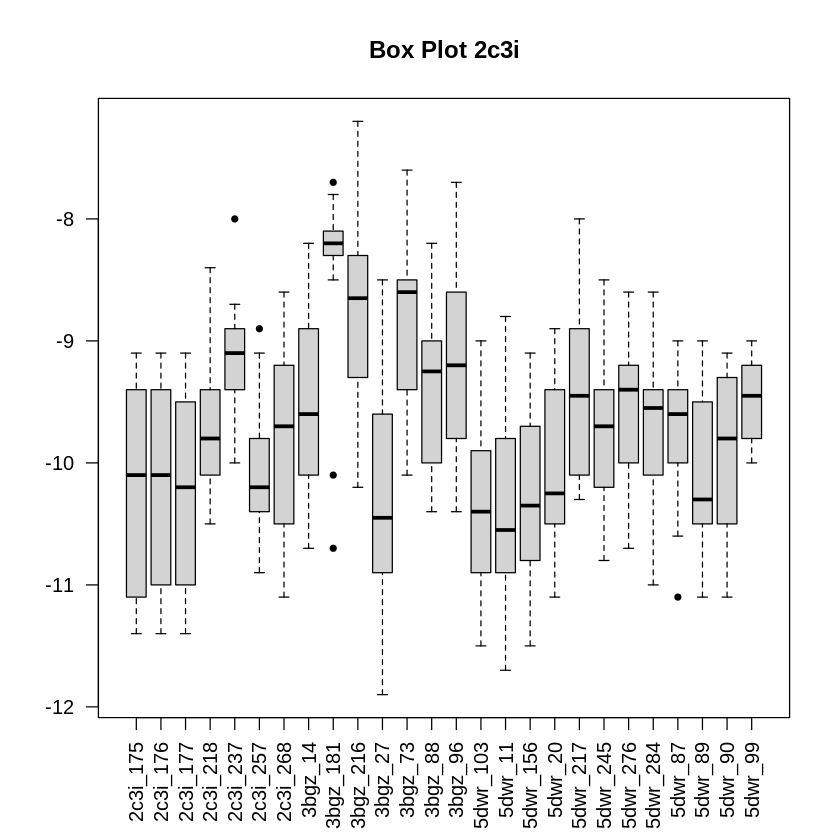

In [8]:
### absolute difference > 2.0 kcal/mol

root_dir <- "work/data"

data_ba <- analyzeProtein(root=root_dir,"2c3i",2.0)

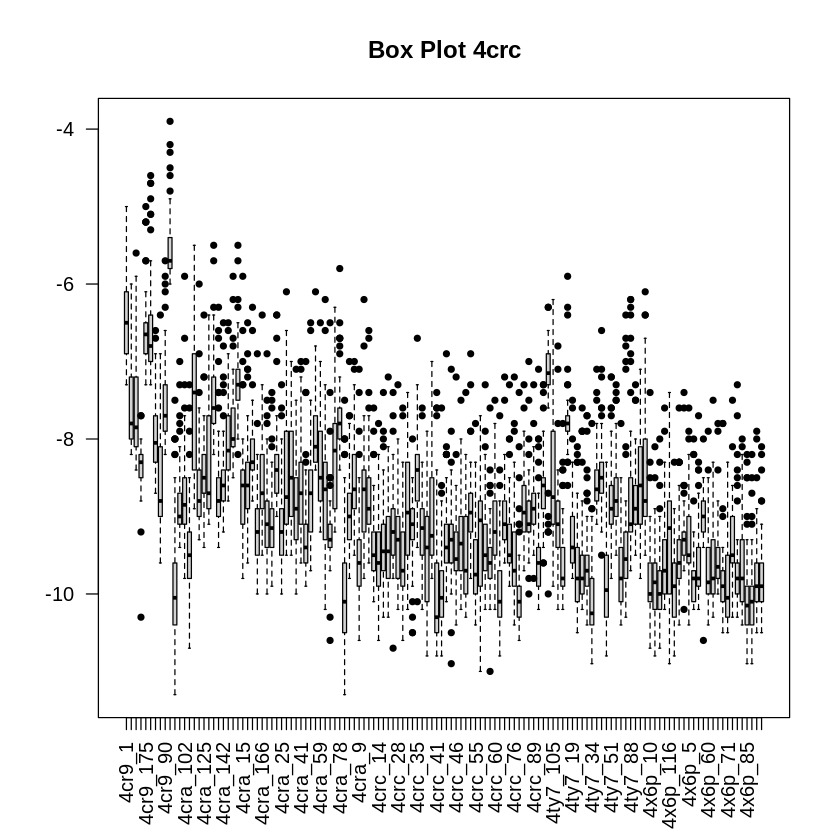

In [10]:
data_ba <- analyzeProtein(root=root_dir,"4crc",2.0)